# The discrete Fourier transform (DFT)

TMA4135 Autumn 2023


Load some useful packages and functions:


In [1]:
import numpy as np 
from math import pi
from numpy import sin, cos
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

## Example: low-pass filters

The unfiltered data is sampled from the function
\begin{align*}
f(t) = \mathrm{sin}^3 (2\pi t) + \mathrm{cos}\left(6\pi t\right)\mathrm{cos}\left(12\pi t\right)\mathrm{sin}\left(6\pi t\right) .
\end{align*}
The idea is to compute the discrete Fourier transform, "filter out" all frequencies above the cut-off frequency $k_{\mathrm{cut}}=8 $ Hz, then compute a filtered signal through the inverse transform:

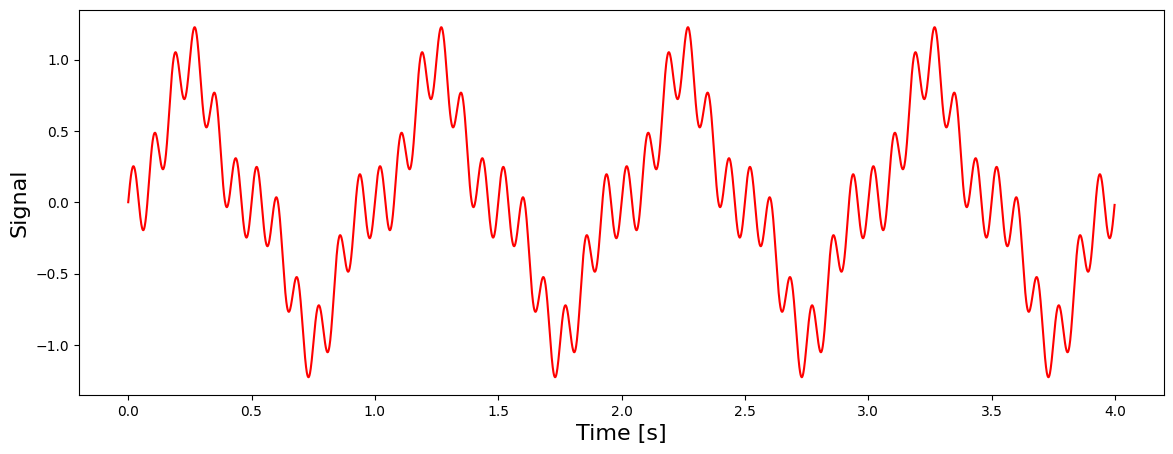

In [2]:
#INPUT DATA
dt = .001 #temporal resolution [s]
t = np.arange(0, 4, dt) #array with time instants, over 4 seconds
signal = sin(2*pi*t)**3 + sin(3*2*pi*t)*cos(3*2*pi*t)*cos(6*2*pi*t)  #generate signal

#Plot original signal
plt.figure(figsize=(14, 5))
plt.plot(t, signal, 'r', label='Original signal')
plt.ylabel('Signal', fontsize = 16)
plt.xlabel('Time [s]', fontsize = 16)
plt.show()

We will now compute the discrete Fourier transform and plot the spectrum:

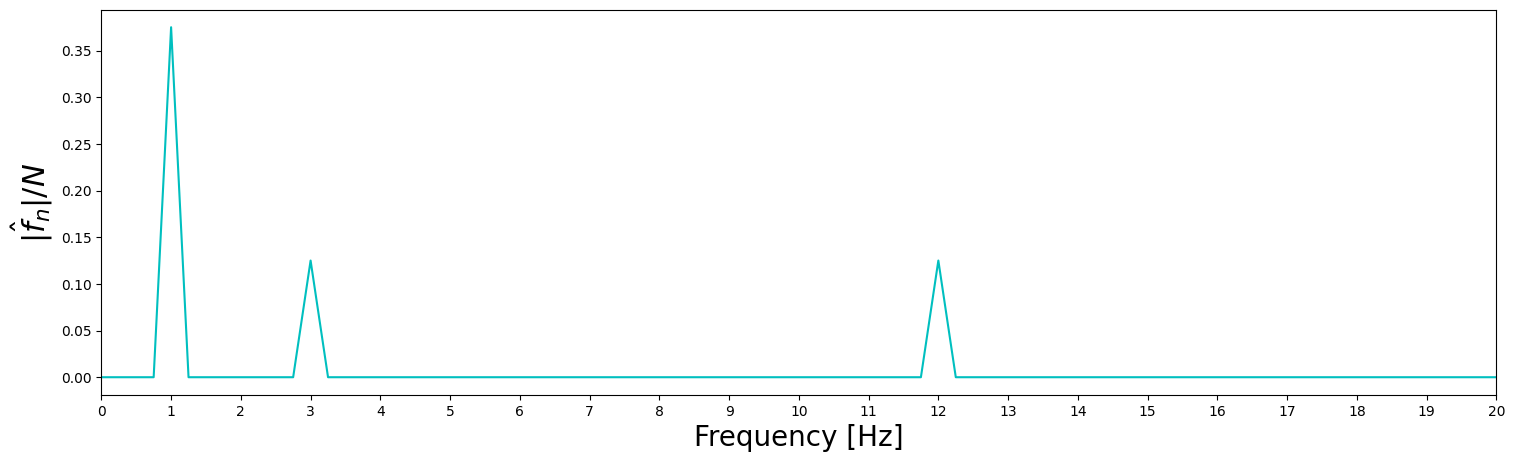

In [3]:
#Compute the DFT of the signal
fHat = np.fft.fft(signal) #Compute the DFT of the original signal
N = fHat.size #Number of data points
freq = (1/(dt*N))*np.arange(N) #construct a vector of discrete frequencies

#Plot the frequency spectrum
plt.figure(figsize=(18, 5))
L = np.arange(0,np.floor(N/2),dtype='int') #only plot the first half of the spectrum
plt.plot(freq[L],np.abs(fHat[L])/N,"c-")
plt.xlabel('Frequency [Hz]', fontsize = 20)
plt.ylabel('$|\hat{f}_n|/N$', fontsize = 22)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 20.5, 1))
plt.show()

We can cut out all frequencies above $k_{\mathrm{cut}}$ and perform the inverse transform to compute the filtered signal:

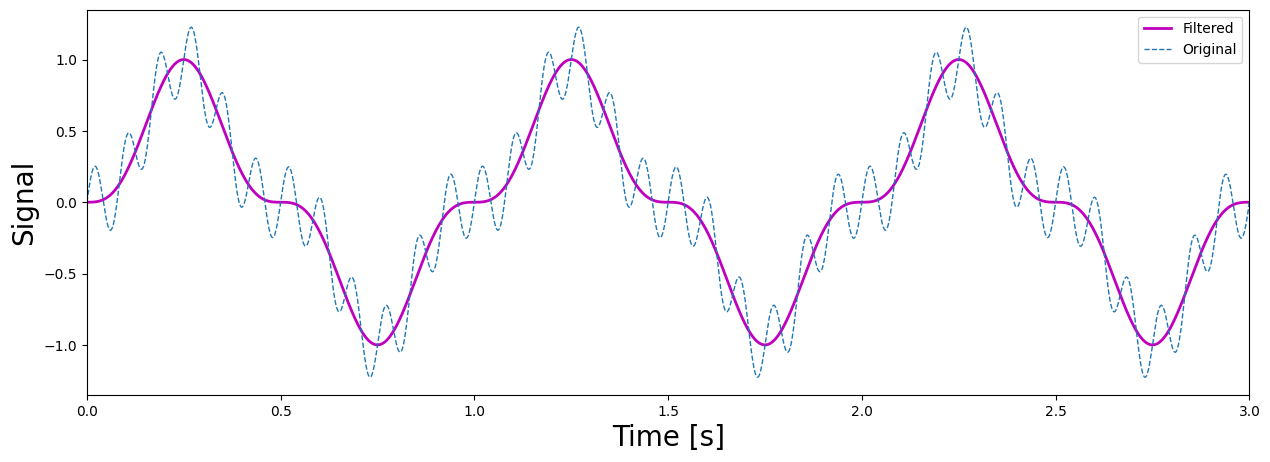

In [4]:
#Set a cut-off frequency in the interval ]5,10[ Hz
kCut = 8 #cut-off frequency [Hz]

#Cut higher frequencies than kCur (filter signal)
lowpass_DFT = fHat #copy the original DFT
sample_freq = np.fft.fftfreq(signal.size, d=dt) #compute frequencies symmetrically (- and +)
lowpass_DFT[np.abs(sample_freq) > kCut] = 0 #set to 0 all components with |freq| > kCut

filtered_signal = np.fft.ifft(lowpass_DFT) #perform inverse DFT to compute filtered signal

#Plot original and filtered signals 
plt.plot(t, filtered_signal.real, 'm', linewidth=2, label='Filtered')
plt.plot(t, signal, '--', label='Original',  linewidth=1)
plt.xlabel('Time [s]', fontsize = 20)
plt.ylabel('Signal', fontsize = 20)
plt.legend(loc='best')
plt.xlim([0, 3])
plt.show()